In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from sklearn import datasets, linear_model, utils,decomposition, manifold
import copy as cp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
import time
import warnings

import numpy.random as randn
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py
import copy 

from scipy.integrate import quad
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles
import sklearn.cluster as cluster

import sklearn.datasets as data
import sklearn.preprocessing as skp
import sklearn.cluster as cluster
import sklearn.mixture as mixture

import sklearn.neighbors as kg
from itertools import cycle, islice
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler    # module pour centrer et réduire les variables

# Réduction de dimension

## Apprentissage supervisé vs non-supervisé

Soit un nuage d'observations $\left\{x_1,....x_n\right\}$, l'apprentissage non supervisé consiste a créer un modèle $\color{red}{\text{expliquant}}$ ces données. Différent de l'apprentissage supervisé ou on apprend une transformation $y=f(x)$.

$\color{red}{\text{expliquant}}$ = qu'est ce que cela veut dire ?

On va chercher $\color{red}{\text{une structure dans les données qui peuvent expliquer au mieux les données}}$ .

Exemple d'apprentissage **non supervisé**:

- **clustering**: $\color{red}{\text{essayer de regrouper les données en paquets}}$. On peut espérer que les données dans le même paquet soient similaires et plus différentes lorsqu'elles ne sont pas dans le même paquet.

Le clustering peut aussi permettre de faire de la classification sans savoir dans quelles classes sont les données.

- **réduction de dimension** essayer de trouver des transformations $z=\phi(x)$ et $x\approx \psi(z)$ tel que $z$ soit en dimension $\color{red}{\text{beaucoup plus petite}}$. Cela revient à dire les données sont "faussement en grande dimension" et peuvent s'expliquer principalement par un nombre réduit de variables.

## Clustering

$\color{red}{\text{Essayer de regrouper les données en paquets}}$. 

Applications:
- classifier des images, sans connaître les labels (sans savoir à quelles catégories les données appartiennent)
- classifier des textes, sans connaître les labels (sans savoir à quelles catégories les données appartiennent)
- regrouper des patients en fonction de caractéristiques médicales, etc.

### Approche basée sur la distance

**Idée**: on regroupe les données en fonction de leur proximité au sens de la distance *d(x,y)*.

Méthode des $\color{red}{\text{K moyennes}}$.

**Principe**:
- on va construire K paquets,
- on choisit aléatoirement $k$ données $(x_1,...,x_k)$ qui seront les centres des paquets,
- on associe à chaque point le paquet dont le centre est le plus proche,
- on modifie le centre du paquet,
- on continue jusqu'à ce que cela se stabilise.

On doit évidemment bien $\color{red}{\text{choisir le nombre de Clusters}}$. A priori ce n'est pas évident.

La question de l'initialisation est aussi compliquée.

Selon $\color{red}{\text{l'initialisation on peut obtenir des résultats très différents}}$.

In [2]:
def plot_kmeans1():
    plt.figure(figsize=(14, 5))

    n_samples = 1500
    random_state = 170
    X, y = make_blobs(n_samples=n_samples, random_state=random_state)

    # Incorrect number of clusters
    y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
    y_pred2 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

    fig = make_subplots(
        rows=1, cols=2
    ) 
    fig.add_trace(go.Scatter(x=X[:,0],y=X[:,1],mode='markers',marker_size=5,marker_color=y_pred),row=1,col=1)
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    #plt.title("2 paquets")
    fig.add_trace(go.Scatter(x=X[:,0],y=X[:,1],mode='markers',marker_size=5,marker_color=y_pred2),row=1,col=2)
    fig.show()

In [3]:
plot_kmeans1()

<Figure size 1008x360 with 0 Axes>

In [4]:
def plot_Kmean3d(n_c,n_init,rand):
    np.random.seed(5)

    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    if rand==0:
        estimator=KMeans(n_clusters=n_c,random_state=150)
    else:
        estimator=KMeans(n_clusters=n_c,n_init=n_init,init="random")
    estimator.fit(X)
    labels = estimator.labels_
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{"type": "scene"}, {"type": "scene"}]],
    ) 
    fig.add_trace(go.Scatter3d(x=X[:,3],y=X[:,0],z=X[:,2],mode='markers',marker_size=5,marker_color=labels.astype(float)),row=1,col=1)
    y = np.choose(y, [1, 2, 0]).astype(float)
    fig.add_trace(go.Scatter3d(x=X[:,3],y=X[:,0],z=X[:,2],mode='markers',marker_size=5,marker_color=y),row=1,col=2)

    fig.show()

In [5]:
plot_Kmean3d(3,10,0)

In [6]:
def plot_kmeans2():
    plt.figure(figsize=(14, 5))

    n_samples = 1500
    random_state = 170
    X, y = make_blobs(n_samples=n_samples, random_state=random_state)

    # Incorrect number of clusters
    y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

    
    X2,y  = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    y_pred2 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X2)

    fig = make_subplots(
        rows=1, cols=2
    ) 
    fig.add_trace(go.Scatter(x=X[:,0],y=X[:,1],mode='markers',marker_size=5,marker_color=y_pred),row=1,col=1)
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    #plt.title("2 paquets")
    fig.add_trace(go.Scatter(x=X2[:,0],y=X2[:,1],mode='markers',marker_size=5,marker_color=y_pred2),row=1,col=2)
    fig.show()

In [7]:
plot_kmeans2()

<Figure size 1008x360 with 0 Axes>

On voit que l'approche basée sur la  $\color{red}{\text{distance n'est pas forcement très bonne}}$.

En effet deux points peuvent être pas si éloignés et ne pas être dans le même paquet.

Comment faire ?

### Approche agglomérative

Le $\color{red}{\text{clustering hierarchique}}$ est composée de deux méthodes qui vont générer une succession de composition en paquet. Ensuite on choisit la meilleure décomposition.

Deux types de $\color{red}{\text{clustering hiérarchique}}$:

- **clustering descendant**: Toutes les observations sont dans le même paquet, puis on divise progressivement les paquets.
- **clustering ascendant**: Chaque observation est un paquet, puis on fusionne progressivement les paquets.

**Clustering ascendant**: on $\color{red}{\text{fusionne les paquets les plus proches}}$

Algorithme:

1) Initialisation:
- on met chaque point dans un paquet,

2) Itération:
- on trouve les paquets les plus proches $P_i$ et $P_j$, en utilisant une matrice de similarité

- on fusionne les deux paquets $P_i$ et $P_j$ en $P_k$,

3) Arrêt
- On arrête lorsqu'on fusionne les deux derniers paquets.

**Matrice de similarité**: matrice qui mesure une distance entre les clusters. $\color{red}{\text{Quelle distance}}$ ?

Plusieurs options

- "single linkage"
- "average linkage"
- "complete linkage"
- "ward linkage"

**Single Linkage**:

La distance entre deux paquets est donnée par la distance entre les deux points les plus proches de paquets différent:

$$
d_{min}(P_i,P_j)=\operatorname{min}(d(x_{k_i},x_{k_j}), x_{k_i} \in P_i, x_{k_j} \in P_j)
$$

- Classes assez "générales".
- Peu robuste aux anomalies dans les données et aux données bruitées.

**Complete Linkage**:

La distance entre deux paquets est donnée par la distance entre les deux points les plus éloignées de paquets différent:

$$
d_{max}(P_i,P_j)=\operatorname{max}(d(x_{k_i},x_{k_j}), x_{k_i} \in P_i, x_{k_j} \in P_j)
$$

- Classes plus "spécifiques". 
- Peu robuste aux anomalies dans les données et aux données bruitées.

**Average Linkage**:

La distance entre deux paquets est donnée par la distance moyenne entre les points de chaque paquet:

$$
d_{ave}(P_i,P_j)=\frac{1}{\mid P_i\mid \mid P_j \mid}\sum_{x_{k_i}\in P_i}\sum_{x_{k_j}\in P_j}d(m_{k_i},m_{k_j})
$$

- Robuste aux anomalies dans les données et aux données bruitées.

**Ward linkage**:
On choisit la fusion qui minimise la variance du nouveau paquet créé:

donc cela revient à minimiser pour les nouveaux paquets possibles la quantité

$$
I_i=\frac{1}{\mid P_i\mid} \sum_{x_{k_i} \in P_i}d(x_{k_i},m_i), \quad \mbox{avec } m_i=\frac{1}{\mid P_i\mid} \sum_{x_{k_i} \in P_i}x_{k_i}
$$

On peut utiliser tout type de distance: l1, l2, Manhattan etc

On obtient une série de possibilités de cluster: **Comment on choisit ?**

- on se fixe à l'avance le nombre de clusters,
- on s'arrête quand la distance entre les classes semble suffisamment importante.

In [8]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

def plot_dendogram():
    X,y = make_moons(n_samples=200, noise=.05)
    model = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(X)
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

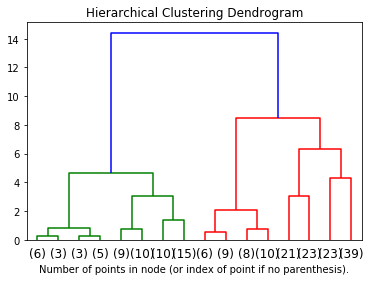

In [9]:
plot_dendogram()

### Approche de densité

La méthode à $\color{red}{\text{densité est basée sur une vision des paquets}}$ comme des:

$\color{red}{\text{des zones ou la densité de points est grande, séparées par des zones de faible densité}}$.

On part d'un point

- tant que autour de lui au sens d'une certaine distance $d(x,y)$ il y a suffisamment de points on le met lui et les suivants dans le même paquet.

- dès qu'on arrive à un avec peu de voisins, on arrête

- on recommence avec un point qu'on n’a pas encore classé. Et ainsi de suite.

https://www.youtube.com/watch?v=_A9Tq6mGtLI

### Comparaison

In [10]:
def plot_comp():
    np.random.seed(0)

    n_samples = 1500
    noisy_circles = make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
    blobs = make_blobs(n_samples=n_samples, random_state=8)
    no_structure = np.random.rand(n_samples, 2), None

    # Anisotropicly distributed data
    random_state = 150
    X, y = make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.7], [-0.5, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)

    varied = make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
    plt.figure(figsize=(9 * 2 + 3, 13))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

    plot_num = 1
    default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}
    datasets = [
        (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                    'min_samples': 20, 'xi': 0.25}),
        (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
        (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
        (blobs, {}),
        (no_structure, {})]

    for i_dataset, (dataset, algo_params) in enumerate(datasets):
        # update parameters with dataset-specific values
        params = default_base.copy()
        params.update(algo_params)

        X, y = dataset
        X = skp.StandardScaler().fit_transform(X)

        bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

        # connectivity matrix for structured Ward
        connectivity = kg.kneighbors_graph(
            X, n_neighbors=params['n_neighbors'], include_self=False)
        # make connectivity symmetric
        connectivity = 0.5 * (connectivity + connectivity.T)

        # ============
        # Create cluster objects
        # ============
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
        dbscan = cluster.DBSCAN(eps=params['eps'])
        average_linkage = cluster.AgglomerativeClustering(
            linkage="average", affinity="cityblock",
            n_clusters=params['n_clusters'], connectivity=connectivity)
        gmm = mixture.GaussianMixture(
            n_components=params['n_clusters'], covariance_type='full')

        clustering_algorithms = (
            ('MiniBatch\nKMeans', two_means),
            ('MeanShift', ms),
            ('Agglomerative\nClustering', average_linkage),
            ('DBSCAN', dbscan),
            ('Gaussian\nMixture', gmm)
        )

        for name, algorithm in clustering_algorithms:
            # catch warnings related to kneighbors_graph
            with warnings.catch_warnings():
                warnings.filterwarnings(
                    "ignore",
                    message="the number of connected components of the " +
                    "connectivity matrix is [0-9]{1,2}" +
                    " > 1. Completing it to avoid stopping the tree early.",
                    category=UserWarning)
                warnings.filterwarnings(
                    "ignore",
                    message="Graph is not fully connected, spectral embedding" +
                    " may not work as expected.",
                    category=UserWarning)
                algorithm.fit(X)

            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(int)
            else:
                y_pred = algorithm.predict(X)

            plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)

            colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
            # add black color for outliers (if any)
            colors = np.append(colors, ["#000000"])
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

            plt.xlim(-2.5, 2.5)
            plt.ylim(-2.5, 2.5)
            plt.xticks(())
            plt.yticks(())
            plot_num += 1
    plt.show()

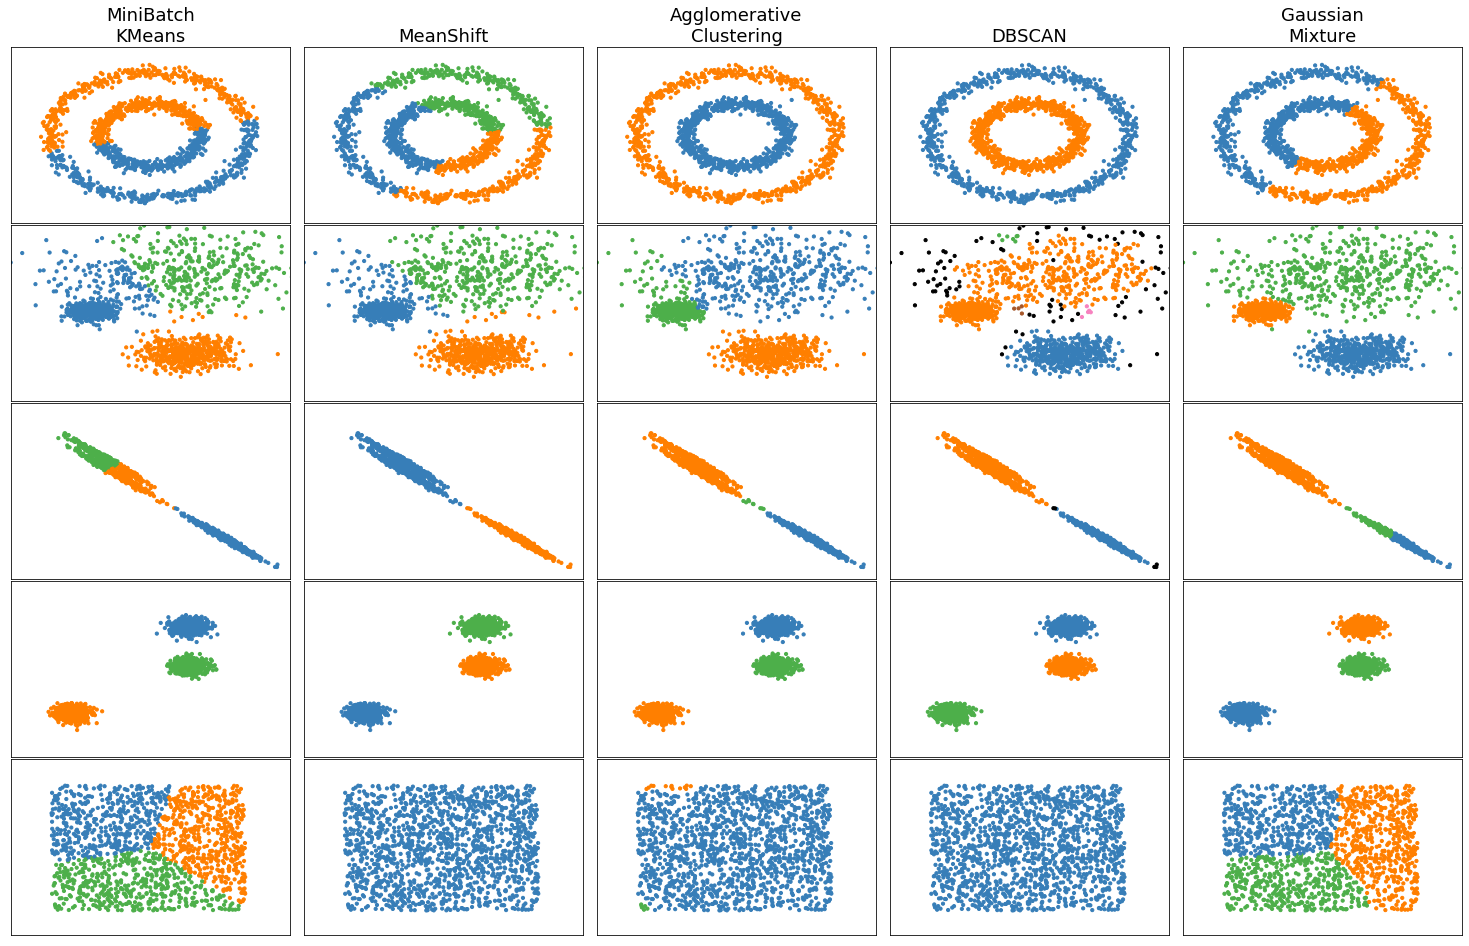

In [11]:
plot_comp()

## Problème la dimension (encore)

Régression/classification en grande dimension:

- $d>n$ avec $d$ la dimension et $n$ le nombre d'exemples, on risque $\color{red}{\text{le sur-apprentissage}}$.
- le clustering est difficile en grande dimension.

**Solution**: se ramener à un problème en plus petite dimension ??


En effet en grande dimension les exemples sont isolés: $\color{red}{\text{donc les approches de type densité ou distance vont mal marcher}}$.

- Lorsqu'on prend une distance pixel par pixel, un 8 et un 2 peuvent être aussi proches que deux $2$.
- la densité des points est toujours faible.

**Solution**: se ramener à un problème en plus petite dimension ??

## Réduction de dimension

On a un échantillon  $\left\{x_1,....x_n\right\}$ avec $x_i$ de dimension $d>>1$.

On cherche:
- $z=\phi(x)$,
- $\hat{x} =\psi(z)$,

tel que

$$
\operatorname{min}_{\psi,\phi}d(x,\hat{x})
$$

**Intérêt**:
- réduire les données en dimension 2 ou 3 pour les visualiser et visualiser les données proches,
- compresser des données,
- améliorer l'efficacité des méthodes de **régression**, **classification** ou **clustering** en diminuant la dimension ce qui permet de limiter le sur-apprentissage.

### Réduction de dimension linéaire

In [12]:
def plot_rec1D():
    plt.figure(figsize=(14, 5))

    theta = np.random.uniform(0.0,2.0*np.pi,300)
    r     =  np.random.uniform(0.0,1.0,300) 
    X  =np.zeros((300,2))
    X2 =np.zeros((300,2))
    X3 =np.zeros((300,2))
    X[:,0] =r[:]*np.cos(theta[:])
    X[:,1] =r[:]*np.sin(theta[:])
    
    X2[:,0] =np.cos(theta[:])
    X2[:,1] =np.sin(theta[:])
    
    X3[:,0] = np.random.uniform(0.0,1.0,300)
    X3[:,1] = X3[:,0]*2.5-1.3

    fig = make_subplots(
        rows=1, cols=3
    ) 
    fig.add_trace(go.Scatter(x=X[:,0],y=X[:,1],mode='markers',marker_size=5),row=1,col=1)
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    #plt.title("2 paquets")
    fig.add_trace(go.Scatter(x=X2[:,0],y=X2[:,1],mode='markers',marker_size=5),row=1,col=2)
    fig.add_trace(go.Scatter(x=X3[:,0],y=X3[:,1],mode='markers',marker_size=5),row=1,col=3)
    fig.show()

In [13]:
plot_rec1D()

<Figure size 1008x360 with 0 Axes>

In [14]:
def plot_rec2D():
    plt.figure(figsize=(15, 9))

    theta = np.random.uniform(0.0,2.0*np.pi,600)
    phi = np.random.uniform(0.0,2.0*np.pi,600)
    r     =  np.random.uniform(0.0,1.0,600) 
    X  =np.zeros((600,3))
    X2 =np.zeros((600,3))
    X3 =np.zeros((600,3))
    X4 =np.zeros((600,3))
    X5 =np.zeros((600,3))
    
    X[:,0] =r[:]*np.sin(theta[:])*np.cos(phi[:])
    X[:,1] =r[:]*np.sin(theta[:])*np.sin(phi[:])
    X[:,2] =r[:]*np.cos(theta[:])
    
    X2[:,0] =np.sin(theta[:])*np.cos(phi[:])
    X2[:,1] =np.sin(theta[:])*np.sin(phi[:])
    X2[:,2] =np.cos(theta[:])
    
    X3[:,0] =0.5*np.sin(theta[:])
    X3[:,1] =0.5*np.cos(theta[:])
    X3[:,2] =0.5*np.ones(600)
    
    X4[:,0] =np.random.uniform(0.0,1.0,600)
    X4[:,1] =np.random.uniform(0.0,1.0,600)
    X4[:,2] =1.5*X4[:,0]-1.3*X4[:,1]+0.5
    
    X5[:,0] =np.random.uniform(0.0,1.0,600)
    X5[:,1] =0.5*np.ones(600)
    X5[:,2] =1.2*X4[:,0]+1.5

    fig = make_subplots(rows=2, cols=3, specs=[[{'type':'scene'}, {'type':'scene'}, {'type':'scene'}],
                                           [{'type':'scene'}, {'type':'scene'}, {'type':'scene'}]])
    fig.add_trace(go.Scatter3d(x=X[:,0],y=X[:,1],z=X[:,2],mode='markers',marker_size=4),row=1,col=1)
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    #plt.title("2 paquets")
    fig.add_trace(go.Scatter3d(x=X2[:,0],y=X2[:,1],z=X2[:,2],mode='markers',marker_size=4),row=1,col=2)
    fig.add_trace(go.Scatter3d(x=X3[:,0],y=X3[:,1],z=X3[:,2],mode='markers',marker_size=4),row=1,col=3)
    
    fig.add_trace(go.Scatter3d(x=X4[:,0],y=X4[:,1],z=X4[:,2],mode='markers',marker_size=4),row=2,col=1)
    fig.add_trace(go.Scatter3d(x=X5[:,0],y=X5[:,1],z=X5[:,2],mode='markers',marker_size=4),row=2,col=2)
    fig.show()


In [15]:
plot_rec2D()

<Figure size 1080x648 with 0 Axes>

La méthode la plus connue pour la réduction de dimension est l' **ACP** (analyse en composante principale).

Cette méthode fait l'hypothèse que les $\color{red}{\text{transformations $\phi(x)$ et $\psi(z)$ sont linéaires}}$.  On les construit en résolvant

$$
\operatorname{\min}_{\phi,\psi}\sum_{i=1}^n d ( x_i - \psi(\phi( x_i)),0)^2
$$

**Principe**: on approche le nuage par un "plan" de dimension plus basse qui explique bien les données.

- On construit de nouvelles directions qui expliquent au mieux la $\color{red}{\text{dispersions des points}}$ ( voir ensuite).

- On sélectionne les $k$ meilleures directions,

- On définit des approximations de chaque point avec ces $k$ directions

$$
x\approx \sum_{i=1}^k b_i d_i  $$

avec $d_i$ ces directions. La représentation est basse dimension est donnée par $(b_1,..,b_k)$.

In [16]:
def plot_exemple_simple(vx,vy,vz):
    plt.figure(figsize=(15, 9))

    X  =np.zeros((600,3))
    rng = np.random.RandomState(0)
    P=np.matrix([[0, 1,0], [0,0,1],[1,0,0]])
    eps=0.001
    cov = np.matrix([[vx+eps,0, 0], [0,vy+eps, 0],[0,0,vz+eps]])
    A=(P*cov)*np.linalg.inv(P)
    
    X = rng.multivariate_normal(mean=[0, 0, 0], cov=A, size=600)
    
    acp = PCA()
    acp.fit(X)
    axes_principaux=acp.components_ 
    
    A= np.zeros((8,3))
    A[0,0]=-2.0; A[0,1]=-2.0; A[0,2]=-2.0
    A[1,0]=-2.0; A[1,1]=2.0; A[1,2]=-2.0
    A[2,0]=-2.0; A[2,1]=-2.0; A[2,2]=2.0
    A[3,0]=-2.0; A[3,1]=2.0; A[3,2]=2.0
    
    A[4,0]=2.0; A[4,1]=-2.0; A[4,2]=-2.0
    A[5,0]=2.0; A[5,1]=2.0; A[5,2]=-2.0
    A[6,0]=2.0; A[6,1]=-2.0; A[6,2]=2.0
    A[7,0]=2.0; A[7,1]=2.0; A[7,2]=2.0
    
    fig = make_subplots(rows=1, cols=1, specs=[[{'type':'scene'}]])
    fig.add_trace(go.Scatter3d(x=X[:,0],y=X[:,1],z=X[:,2],mode='markers',marker_size=2),row=1,col=1)
    
    fig.add_trace(go.Scatter3d(x=A[:,0],y=A[:,1],z=A[:,2],mode='markers',marker_size=0.5),row=1,col=1)
    for i, (comp, var) in enumerate(zip(acp.components_, acp.explained_variance_)):
        comp = comp * var  # scale component by its variance explanation power
        fig.add_trace(go.Scatter3d(
            x=[0.0, comp[0]],
            y=[0.0, comp[1]],
            z=[0.0, comp[2]],
            marker_size=7,
            line_width=7))
    fig.update_layout(scene_aspectmode='cube')
    fig.show()


In [17]:
@interact(vx=(0.0,1.0,0.05),vy=(0.0,1.0,0.05),vz=(0.0,1.0,0.05))
def plot7(vx=1.0,vy=1.0,vz=1.0):
    plot_exemple_simple(vx,vy,vz)

interactive(children=(FloatSlider(value=1.0, description='vx', max=1.0, step=0.05), FloatSlider(value=1.0, des…

Comment on peut faire ça sur un $\color{red}{\text{cas concret}}$.

**Exemple 1**: les iris. 

On a un jeu de données sur les iris. On cherche a déterminer le type d'iris. Problème de classification ou de clustering. $X$ ici est en dimension 4.

**Stratégie**: on compresse la $\color{red}{\text{dimension de 4 à 2 avec l'ACP puis on applique du clustering}}$.



In [18]:
import sklearn.datasets as sk_data
iris = sk_data.load_iris()

def plot_begin_iris():
    X = iris.data    # les données(lignes = individus, colonnes = variables)
    y = iris.target   # les étiquettes (=la variété des iris)
    sc_scaled = StandardScaler().fit(X)
    Xcr = sc_scaled.transform(X)

    n=Xcr.shape[0]
    p=Xcr.shape[1]

    acp = PCA()
    acp.fit(Xcr)

    # axes principaux : les vecteurs propres
    axes_principaux=acp.components_    
    # composantes principales = les nouvelles coordonnées
    composantes_principales = acp.fit_transform(Xcr)     
    # les variances expliquées = les valeurs propres
    var_exp=(n-1)/n*acp.explained_variance_

    PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

     #proportion de variance expliquée
    print("Proportion de dispersion expliquée", acp.explained_variance_ratio_)

    #éboulis des valeurs propres
    fig = plt.figure(figsize=(15, 4))
    ax1 = fig.add_subplot(121)
    ax1.bar(np.arange(1,p+1),var_exp)
    ax1.plot(np.arange(1,p+1),var_exp, 'ro-')

    ax2 = fig.add_subplot(122)
    ax2.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_), 'ro-')

Proportion de dispersion expliquée [0.72962445 0.22850762 0.03668922 0.00517871]


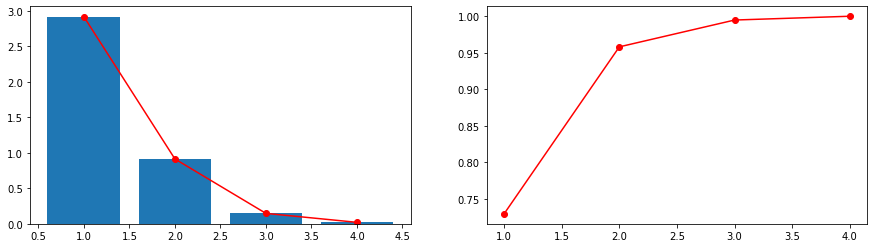

In [19]:
plot_begin_iris()

À gauche la "magnitude" des directions. À droite: la proportion d'explication des données en gardant que 1,2 ou 4 directions.

On voit qu’avec 2 directions on explique 95% des données donc notre représentation réduite des données effectue 5% d'erreur.

In [20]:
#positionnement des individus dans le plan des 2 premières composantes principales
def plot_end_iris():
    X = iris.data    # les données(lignes = individus, colonnes = variables)
    y = iris.target   # les étiquettes (=la variété des iris)
    sc_scaled = StandardScaler().fit(X)
    Xcr = sc_scaled.transform(X)

    n=Xcr.shape[0]
    p=Xcr.shape[1]
    acp = PCA()    
    cp = acp.fit_transform(Xcr)  
    kmeans = KMeans(n_clusters=3).fit(cp[:,0:1]) 
        
    fig = make_subplots(rows=1, cols=2,subplot_titles=('Clustering','Réference'))
    
    fig.add_trace(go.Scatter(x=cp[:,0],y=cp[:,1],mode='markers',marker_size=7,marker_color= kmeans.labels_),row=1,col=1)
    fig.add_trace(go.Scatter(x=cp[:,0],y=cp[:,1],mode='markers',marker_size=7,marker_color=y),row=1,col=2)
    fig.show()

In [21]:
plot_end_iris()

In [22]:
#positionnement des individus dans le plan des 2 premières composantes principales
def plot_end2_iris():
    X = iris.data    # les données(lignes = individus, colonnes = variables)
    y = iris.target   # les étiquettes (=la variété des iris)
    sc_scaled = StandardScaler().fit(X)
    Xcr = sc_scaled.transform(X)

    n=Xcr.shape[0]
    p=Xcr.shape[1]
    acp = PCA()    
    cp = acp.fit_transform(Xcr)  
    kmeans = KMeans(n_clusters=3).fit(cp[:,0:2]) 
        
    fig = make_subplots(rows=1, cols=2,specs=[[{'type':'scene'},{'type':'scene'}]],subplot_titles=('Clustering','Réference'))
    
    fig.add_trace(go.Scatter3d(x=cp[:,0],y=cp[:,1],z=cp[:,2],mode='markers',marker_size=7,marker_color= kmeans.labels_),row=1,col=1)
    fig.add_trace(go.Scatter3d(x=cp[:,0],y=cp[:,1],z=cp[:,2],mode='markers',marker_size=7,marker_color=y),row=1,col=2)
    fig.show()

In [23]:
plot_end2_iris()

On veut que des données proches en $\color{red}{\text{grande dimension reste proche en petite dimension}}$.

Si on veut utiliser $\color{red}{\text{de la régression ou du clustering}}$ après la réduction c'est important.

En effet si deux exemples très éloignés en grande dimension deviennent très proches en petite dimension une méthode de clustering les regrouperait ensemble alors qu'il ne faut pas.

La PCA respecte plus ou moins cette contrainte.

Il existe une autre méthode **MDS** qui est construit $\color{red}{\text{en préservant au mieux les distances des points entre eux dans l'espace réduit}}$.

Il peut donner de meilleurs résultats que la PCA.

**Hypothèse de la PCA et MDS**

Les données sont distribuées en dimension basse sur des "plans". Cela équivaut à dire que la transformation est linéaire.

Que se passe-t-il si on est loin d'être dans ce cas ?




In [24]:
def make_hyperplan(n_samples=100, *, noise=0.0, random_state=None):

    generator = utils.check_random_state(random_state)   
    x = 3 * (generator.rand(1, n_samples) - 0.5)
    y = 2.0 * (generator.rand(1, n_samples) +2.0)
    z = 2.0 * np.ones((1,n_samples)) +1.0
    X = np.concatenate((x, y, z))
    X += noise * generator.randn(3, n_samples)
    X = X.T
    t = np.squeeze(x)
    return X, t

def plot_linear(n_points,n_components):
    
    X, color = make_hyperplan(n_points, noise=0.05)
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(16, -92)
    ax.set_zlim(2.5,3.5)

    pca = decomposition.TruncatedSVD(n_components=2)
    Y_pca= pca.fit_transform(X)
    ax1 = fig.add_subplot(1, 3,2)
    ax1.scatter(Y_pca[:, 0], Y_pca[:, 1], c=color, cmap=plt.cm.Spectral)

    embedding_mds = manifold.MDS(n_components=2,n_init=1)
    Y_mds = embedding_mds.fit_transform(X)
    ax2 = fig.add_subplot(1, 3,3)
    ax2.scatter(Y_mds[:, 0], Y_mds[:, 1], c=color, cmap=plt.cm.Spectral)

def plot_nonlinear(n_points,n_components):
    X, color = datasets.make_swiss_roll(n_points, noise=0.05)

    # Create figure
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(16, -92)

    pca = decomposition.TruncatedSVD(n_components=2)
    Y_pca= pca.fit_transform(X)
    ax1 = fig.add_subplot(1, 3,2)
    ax1.scatter(Y_pca[:, 0], Y_pca[:, 1], c=color, cmap=plt.cm.Spectral)

    embedding_mds = manifold.MDS(n_components=2,n_init=1)
    Y_mds = embedding_mds.fit_transform(X)
    ax2 = fig.add_subplot(1, 3,3)
    ax2.scatter(Y_mds[:, 0], Y_mds[:, 1], c=color, cmap=plt.cm.Spectral)

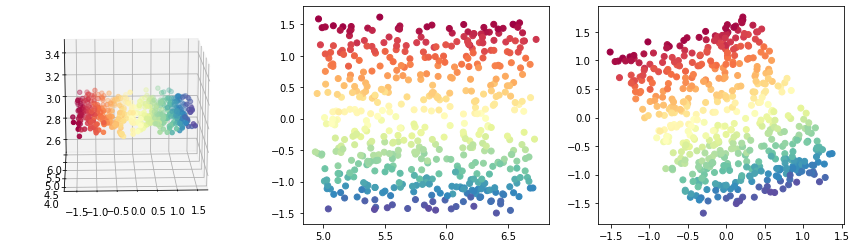

In [25]:
plot_linear(500,2)

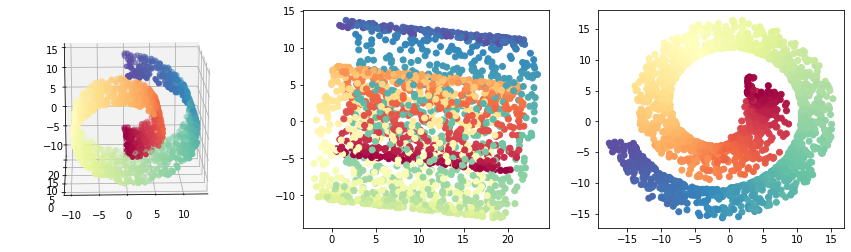

In [26]:
plot_nonlinear(2000,2)

## Réduction de dimension nonlinéaire 

Les méthodes dites d'apprentissage de variété permettent de faire une réduction non linéaire.

On suppose que les données sont distribuées selon une variété (généralisation des surfaces et des courbes).

-**ISOMAP**: préserve les distance sur la variété pendant le plongement,

-**LLE**: préserve les voisiniages locaux sur la variété pendant le plongement,

-**EIgenmaps**: préserve les distance locales la variété pendant le plongement,

-**LTSA**: Préserve que localemet une variété est proche d'un plan.

In [36]:
from sklearn import manifold, datasets, decomposition
from sklearn import utils
from matplotlib import cm, colors
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
import networkx as nx
from matplotlib import offsetbox
from sklearn.manifold import TSNE

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 35

# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# ----------------------------------------------------------------------
# Plot images of the digits
def plot_digits():
    n_img_per_row = 20
    img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
    for i in range(n_img_per_row):
        ix = 10 * i + 1
        for j in range(n_img_per_row):
            iy = 10 * j + 1
            img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

    plt.imshow(img, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title('A selection from the 64-dimensional digits dataset')

# ----------------------------------------------------------------------
# Projection on to the first 2 principal components

X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
# ----------------------------------------------------------------------
# Isomap projection of the digits dataset
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2
                        ).fit_transform(X)
# ----------------------------------------------------------------------
# MDS  embedding of the digits dataset
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)

Eigen =SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack")
X_eig =Eigen.fit_transform(X)

tsne= TSNE(n_components=2,init="pca",learning_rate="auto",n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0)
X_tsne = tsne.fit_transform(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



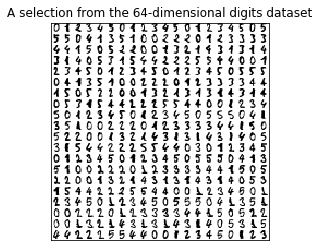

In [30]:
plot_digits()

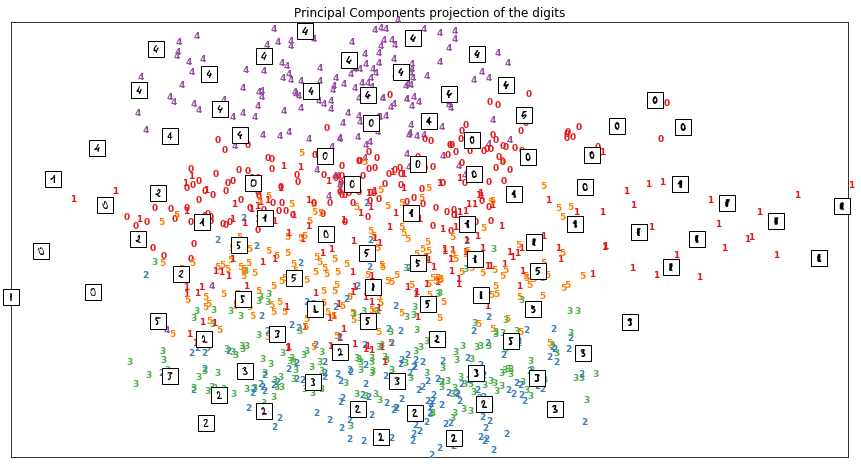

In [31]:
plot_embedding(X_pca,
               "Principal Components projection of the digits")

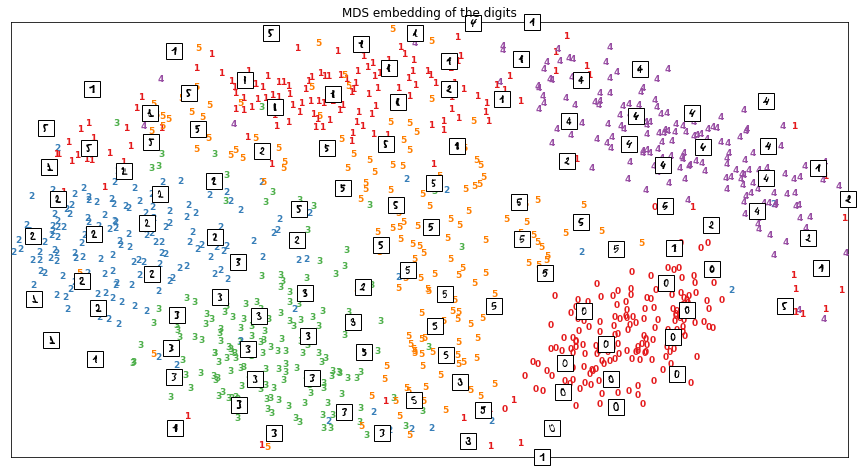

In [32]:

plot_embedding(X_mds,
               "MDS embedding of the digits")

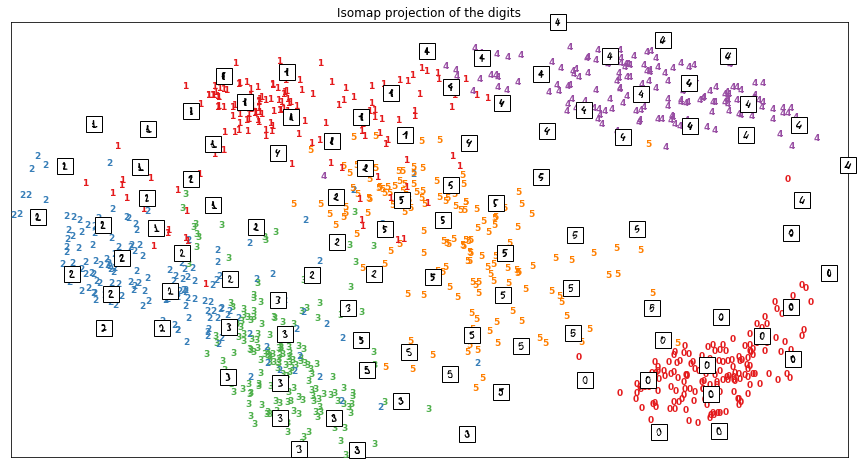

In [33]:
plot_embedding(X_iso,
               "Isomap projection of the digits")

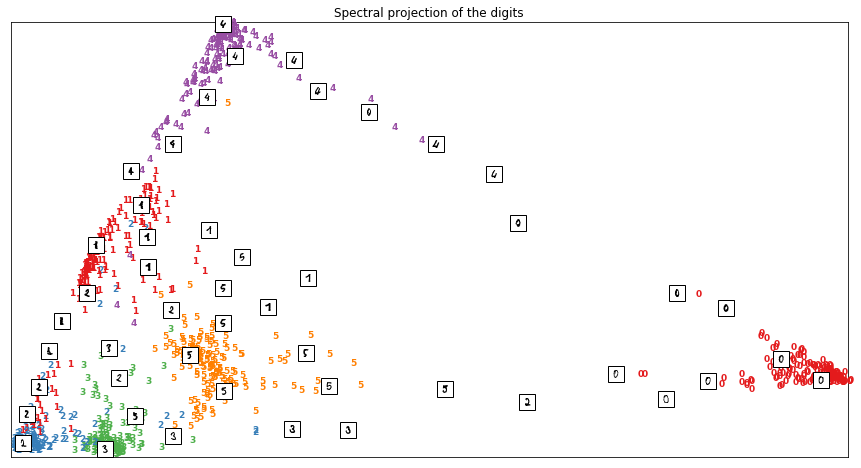

In [34]:
plot_embedding(X_eig,
               "Spectral projection of the digits")

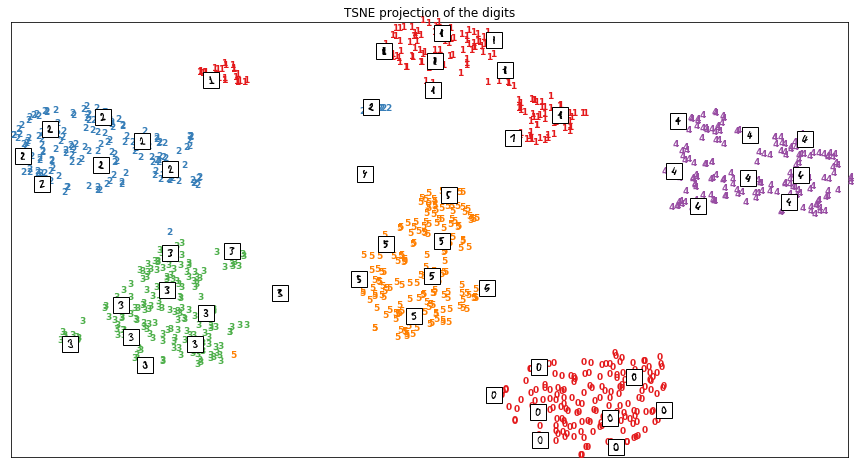

In [35]:
plot_embedding(X_tsne,
               "TSNE projection of the digits")